In [2]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)


2.2.2
1.26.4


In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

In [12]:
# Import packages for statistical test
from scipy import stats

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [14]:
df = pd.read_csv('/Users/roya/Downloads/tiktok_dataset.csv')
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [18]:
df.shape

(19382, 12)

In [19]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [20]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [21]:
df = df.dropna(axis = 0)
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(19084, 12)

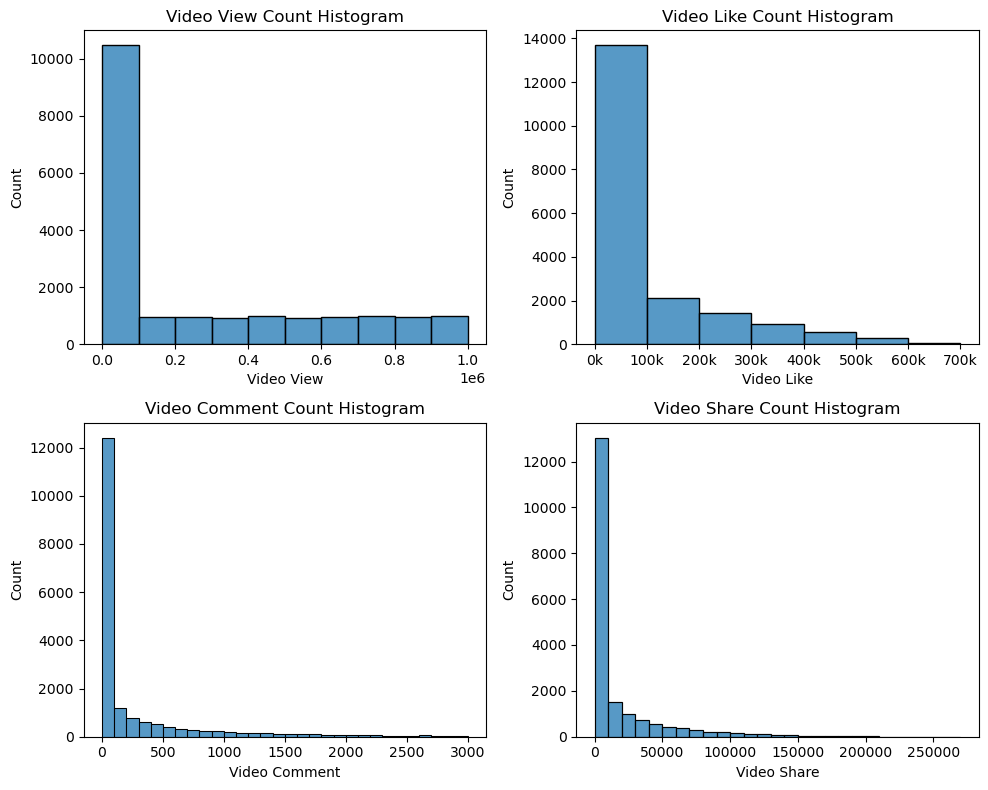

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Video view count histogram
sns.histplot(df['video_view_count'], bins=range(0, (10**6 + 1), 10**5), ax=axes[0, 0])
axes[0, 0].set_title('Video View Count Histogram')
axes[0, 0].set_xlabel('Video View')

# Video like count histogram
sns.histplot(df['video_like_count'], bins=range(0, (7*10**5 + 1), 10**5), ax=axes[0, 1])
axes[0, 1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
axes[0, 1].set_title('Video Like Count Histogram')
axes[0, 1].set_xlabel('Video Like')

# Video comment count histogram
sns.histplot(df['video_comment_count'], bins=range(0, (3001), 100), ax=axes[1, 0])
axes[1, 0].set_title('Video Comment Count Histogram')
axes[1, 0].set_xlabel('Video Comment')

# Video share count histogram
sns.histplot(df['video_share_count'], bins=range(0, (270001), 10000), ax=axes[1, 1])
axes[1, 1].set_title('Video Share Count Histogram')
axes[1, 1].set_xlabel('Video Share')

plt.tight_layout()
plt.show()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64


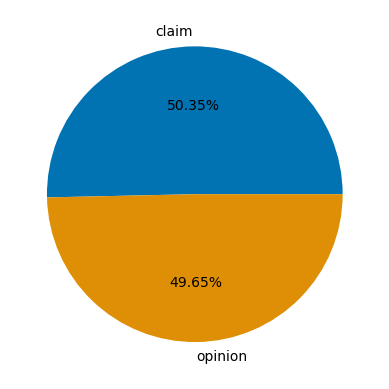

In [25]:
# Find out the number of "claim" and "opinion" videos
print(df['claim_status'].value_counts())

# Visualize the proportion of "claim" and "opinion" videos
palette_color = sns.color_palette('colorblind') 
plt.pie(df['claim_status'].value_counts(), labels=df['claim_status'].value_counts().index, colors=palette_color, autopct='%.02f%%')
plt.show()

In [26]:
df.groupby(['claim_status']).agg({'video_view_count':['mean', 'median']}).reset_index()

claim_status video_view_count          
                           mean    median
0        claim    501029.452748  501555.0
1      opinion      4956.432250    4953.0

In [27]:
# Find out the mean and median like count with different claim status
df.groupby(['claim_status']).agg({'video_like_count':['mean', 'median']}).reset_index()

claim_status video_like_count          
                           mean    median
0        claim    166373.331182  123649.0
1      opinion      1092.729844     823.0

In [28]:
# Find out the mean and median comment count with different claim status
df.groupby(['claim_status']).agg({'video_comment_count':['mean', 'median']}).reset_index()

claim_status video_comment_count       
                              mean median
0        claim          691.164863  286.0
1      opinion            2.697446    1.0

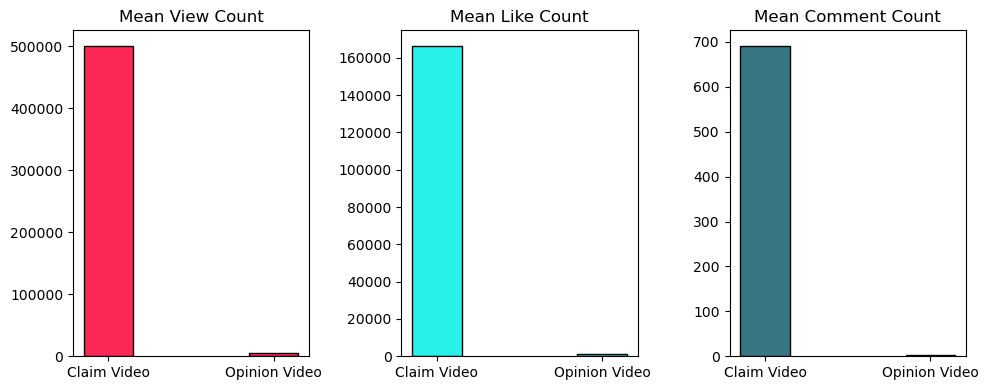

In [29]:
claims = df[df['claim_status'] == 'claim']
opinions = df[df['claim_status'] == 'opinion']
barwidth = 0.3
name = ('Claim Video', 'Opinion Video')

# Mean view/like/comment count
v_count = [claims['video_view_count'].mean(), opinions['video_view_count'].mean()]
l_count = [claims['video_like_count'].mean(), opinions['video_like_count'].mean()]
c_count = [claims['video_comment_count'].mean(), opinions['video_comment_count'].mean()]

plt.figure(figsize=(10, 4)) 
# Subplot 1: Mean View Count
plt.subplot(1, 3, 1)
plt.bar(name, v_count, width=barwidth, edgecolor='black', color = '#fe2858')
plt.title('Mean View Count')

# Subplot 2: Mean Like Count
plt.subplot(1, 3, 2)
plt.bar(name, l_count, width=barwidth, edgecolor='black', color = '#2af0ea')
plt.title('Mean Like Count')

# Subplot 3: Mean Comment Count
plt.subplot(1, 3, 3)
plt.bar(name, c_count, width=barwidth, edgecolor='black', color = '#397684')
plt.title('Mean Comment Count')

plt.tight_layout()
plt.show()

In [30]:
# Investigate the relationship between claim status and author ban status
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

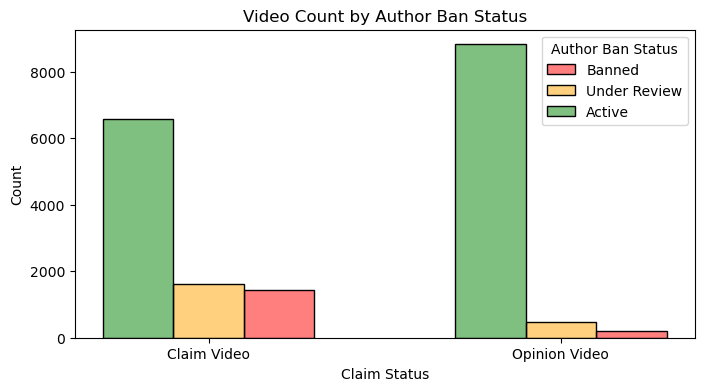

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.6,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)

# Layout
plt.xticks([0, 1], ['Claim Video', 'Opinion Video'])
plt.legend(title='Author Ban Status', labels=['Banned', 'Under Review', 'Active'])
plt.xlabel('Claim Status')
plt.title('Video Count by Author Ban Status')

plt.show()

In [31]:
#create 'text_length' column
df.loc[:, 'text_length'] = df['video_transcription_text'].str.len()
#first five rows
df.head()

/var/folders/hz/bk5_spys11d6yhzyfpqsf2vm0000gp/T/ipykernel_1525/2677400195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_length'] = df['video_transcription_text'].str.len()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [32]:
#extraction of the length of each video_transcription_text 
df[['claim_status','text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


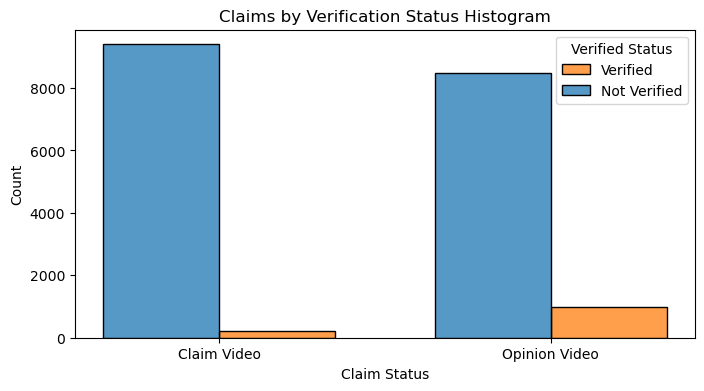

In [34]:
# Visualize the relationship between claim status and verification status
plt.figure(figsize=(8,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.7)

plt.legend(title='Verified Status', labels=['Verified', 'Not Verified'])
plt.xticks([0, 1], ['Claim Video', 'Opinion Video'])
plt.xlabel('Claim Status')
plt.title('Claims by Verification Status Histogram');

In [35]:
# Create engagement rate metrics, including likes per view, comments per view, and shares per view
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']
df['comment_per_view'] = df['video_comment_count'] / df['video_view_count']
df['share_per_view'] = df['video_share_count'] / df['video_view_count']

/var/folders/hz/bk5_spys11d6yhzyfpqsf2vm0000gp/T/ipykernel_1525/28363413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['likes_per_view'] = df['video_like_count'] / df['video_view_count']
/var/folders/hz/bk5_spys11d6yhzyfpqsf2vm0000gp/T/ipykernel_1525/28363413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_per_view'] = df['video_comment_count'] / df['video_view_count']
/var/folders/hz/bk5_spys11d6yhzyfpqsf2vm0000gp/T/ipykernel_1525/28363413.py:4: SettingWithCopyWarning: 
A value is 

In [36]:
# Examine the engagement rate metrics grouped by claim status
engagement_rate = df.groupby(['claim_status']).agg({
    'likes_per_view': ['count', 'mean'],
    'comment_per_view':['mean'],
    'share_per_view':['mean']
}).reset_index()
engagement_rate

claim_status likes_per_view           comment_per_view share_per_view
                        count      mean             mean           mean
0        claim           9608  0.331610         0.001386       0.065867
1      opinion           9476  0.219802         0.000516       0.043699

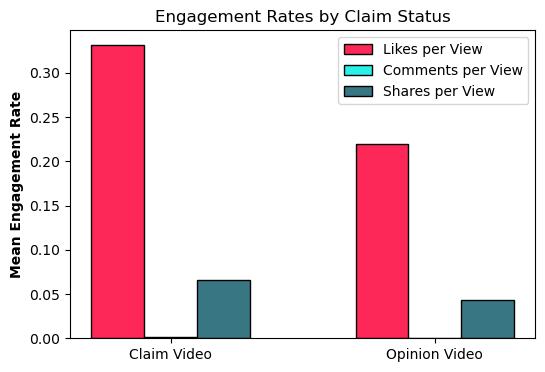

In [37]:
# Extract the mean values
likes_mean = engagement_rate[('likes_per_view', 'mean')]
comments_mean = engagement_rate[('comment_per_view', 'mean')]
shares_mean = engagement_rate[('share_per_view', 'mean')]

barwidth = 0.20
plt.figure(figsize=(6, 4))

# The position of bars
r1 = np.arange(len(likes_mean))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

# Create bars
plt.bar(r1, likes_mean, color='#fe2858', width=barwidth, edgecolor='black', label='Likes per View')
plt.bar(r2, comments_mean, color='#2af0ea', width=barwidth, edgecolor='black', label='Comments per View')
plt.bar(r3, shares_mean, color='#397684', width=barwidth, edgecolor='black', label='Shares per View')

# Layout
plt.ylabel('Mean Engagement Rate', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(likes_mean))], ['Claim Video', 'Opinion Video'])
plt.title('Engagement Rates by Claim Status')
plt.legend()

plt.show()

In [38]:
# Create a `text_length` column, indicate by the number of characters
df['text_length'] = df['video_transcription_text'].str.len()

/var/folders/hz/bk5_spys11d6yhzyfpqsf2vm0000gp/T/ipykernel_1525/1919283977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['video_transcription_text'].str.len()


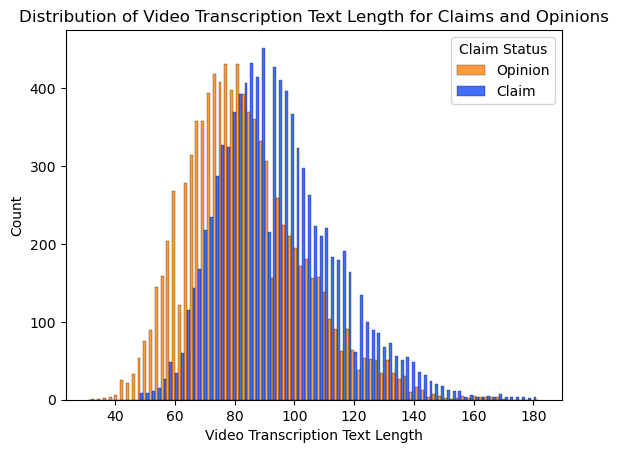

In [39]:
# Visualize the distribution of `text_length` for claims and opinions
sns.histplot(data=df, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="bright", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("Video Transcription Text Length")
plt.ylabel("Count")
plt.title("Distribution of Video Transcription Text Length for Claims and Opinions")
plt.legend(title='Claim Status', labels=['Opinion', 'Claim'])
plt.show()

In [40]:
# Drop the columns that are not relevant to the current analysis
df_cor = df.drop(['#', 'video_id', 'likes_per_view', 'comment_per_view', 'share_per_view'], axis = 1)

In [41]:
df_cor.corr(numeric_only=True)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,1.000000,0.008481,0.011567,0.011560,0.013078,0.000615,-0.001580
video_view_count,0.008481,1.000000,0.804322,0.665635,0.664222,0.554172,0.230212
video_like_count,0.011567,0.804322,1.000000,0.825789,0.823554,0.687185,0.180193
video_share_count,0.011560,0.665635,0.825789,1.000000,0.679910,0.574632,0.147223
video_download_count,0.013078,0.664222,0.823554,0.679910,1.000000,0.832464,0.146382
video_comment_count,0.000615,0.554172,0.687185,0.574632,0.832464,1.000000,0.129659
text_length,-0.001580,0.230212,0.180193,0.147223,0.146382,0.129659,1.000000


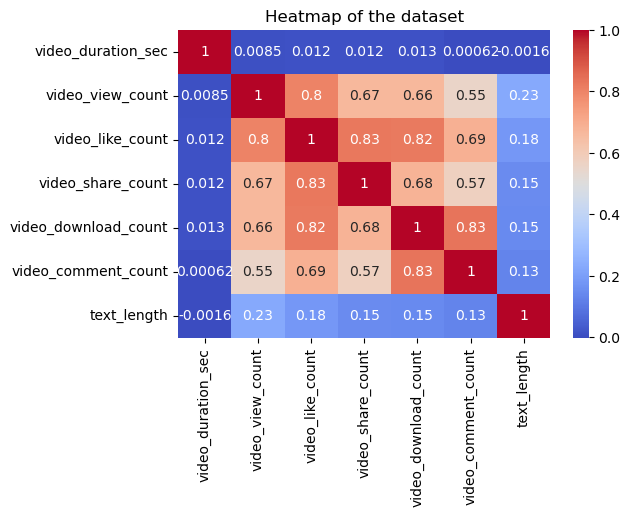

In [42]:
# Create a heatmap to visualize the correlation
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(
    df_cor[['video_duration_sec', 'claim_status', 'author_ban_status', 'video_view_count', 
            'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'text_length']]
    .corr(numeric_only=True), 
    annot=True, 
    cmap='coolwarm')
plt.title("Heatmap of the dataset")
plt.show()

III. Hypothesis testing

After the EDA, several hypothesis tests were conducted to further validate the differences between claim videos and opinion videos.

Comparison of Video Duration (Seconds)

H0: There is no difference in video duration between claim videos and opinion videos.

HA: There is difference in video duration between claim videos and opinion videos.

We choose 5% as the significance level.

In [43]:
# Remind ourselves of the variables we currently have
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,likes_per_view,comment_per_view,share_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128,0.622910,0.002706,0.073175


In [44]:
claim = df[df['claim_status'] == 'claim']
opinion = df[df['claim_status'] == 'opinion']

# Conduct a two-sample t-test to video duration
claim_duration = claim ['video_duration_sec']
opinion_duration = opinion['video_duration_sec']

result_dur = stats.ttest_ind(a = claim_duration, b = opinion_duration, equal_var=False)
statistic_dur = result_dur.statistic
pvalue_dur = result_dur.pvalue

result_dur

TtestResult(statistic=0.540687571628616, pvalue=0.5887292599632779, df=19073.92975301691)

The p-value is 0.589, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no statistically significant difference between claim videos and opinion videos.

In [45]:
# Apply the same procedure to other attributes

# View count
claim_vc = claim['video_view_count']
opinion_vc = opinion['video_view_count']
result_vc = stats.ttest_ind(a = claim_vc, b = opinion_vc, equal_var=False)
statistic_vc = result_vc.statistic
pvalue_vc = result_vc.pvalue

# Like count
claim_lc = claim['video_like_count']
opinion_lc = opinion['video_like_count']
result_lc = stats.ttest_ind(a = claim_lc, b = opinion_lc, equal_var=False)
statistic_lc = result_lc.statistic
pvalue_lc = result_lc.pvalue

# Comment count
claim_cc = claim['video_comment_count']
opinion_cc = opinion['video_comment_count']
result_cc = stats.ttest_ind(a = claim_cc, b = opinion_cc, equal_var=False)
statistic_cc = result_cc.statistic
pvalue_cc = result_cc.pvalue

# Share count
claim_sc = claim['video_share_count']
opinion_sc = opinion['video_share_count']
result_sc = stats.ttest_ind(a = claim_sc, b = opinion_sc, equal_var=False)
statistic_sc = result_sc.statistic
pvalue_sc = result_sc.pvalue

# Text length
claim_tl = claim['text_length']
opinion_tl = opinion['text_length']
result_tl = stats.ttest_ind(a = claim_tl, b = opinion_tl, equal_var=False)
statistic_tl = result_tl.statistic
pvalue_tl = result_tl.pvalue

In [46]:
# Construct a summary table
test_result_table = pd.DataFrame({
    'Test': ['Duration Time', 'View Count', 'Like Count', 'Comment Count', 'Share Count', 'Text Length'],
    'T statistic': [statistic_dur, statistic_vc, statistic_lc, statistic_cc, statistic_sc, statistic_tl],
    'P-Value': [pvalue_dur, pvalue_vc, pvalue_lc, pvalue_cc, pvalue_sc, pvalue_tl],
}).reset_index(drop = True)

test_result_table

,Test,T statistic,P-Value
0,Duration Time,0.540688,0.588729
1,View Count,166.888578,0.000000
2,Like Count,109.742253,0.000000
3,Comment Count,66.341119,0.000000
4,Share Count,82.923414,0.000000
5,Text Length,44.385499,0.000000


The results from the hypothesis tests indicate that, in addition to duration, view count, like count, comment count, and share count are all significantly different between claim videos and opinion videos. Interestingly, significant differences were also found in the transcription text length between claim videos and opinion videos.

IV. Machine Learning

In this section, two machine learning models, a random forest model and an XGBoost model, will be built to predict whether a video contains claim or opinion content. First, the data will be split into training, validation, and test sets with proportions of 60%, 20%, and 20%, respectively. We will then fit the models and tune the hyperparameters using the training set. After that, the validation set will be used to evaluate the models and select the one with better performance. Finally, the selected model’s performance will be assessed using the test set.

In [47]:
# Setup predictors X and target variable y
X = df.copy()
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
y = X['claim_status']

# Dummy encode remaining categorical values
X = pd.get_dummies(X,columns=['verified_status', 'author_ban_status'], drop_first=True)
X = X.drop(['#','claim_status',  'video_id', 'video_transcription_text', 'likes_per_view', 'comment_per_view', 'share_per_view'], axis=1)

X.head()

/var/folders/hz/bk5_spys11d6yhzyfpqsf2vm0000gp/T/ipykernel_1525/2041539478.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [48]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Split the validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

Random Forest Model

In [49]:
# Build the model
rf = RandomForestClassifier(random_state = 517)

# Select hyperparameter options to tune

cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [75, 100, 200],
             }
# Select scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Construct GridSearchCV object to find the optimized hyperparameter (based on recall score)
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5,  refit='recall')

In [50]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 2min 56s, sys: 708 ms, total: 2min 57s
Wall time: 2min 57s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=517),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [51]:
# Best recall score
rf_cv.best_score_

0.991026002107111

In [52]:
# Best parameters
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

XGBoost Model

In [53]:
# Build the model
xgb = XGBClassifier(objective='binary:logistic', random_state = 517)

# Select hyperparameter options to tune

cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Select scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Construct GridSearchCV object to find the optimized hyperparameter (based on recall score)
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5,  refit='recall')

In [54]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 3min 32s, sys: 31.9 s, total: 4min 4s
Wall time: 45.7 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=517, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [55]:
# Best recall score
xgb_cv.best_score_

0.9898176171763818

In [56]:
# Best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

Random Forest

In [57]:
# Use the best estimator from the random forest model 
y_pred_rf = rf_cv.best_estimator_.predict(X_val)

In [58]:
recall = recall_score(y_val, y_pred_rf)
print("Recall score (Validation Set Random Forest):", recall)

Recall score (Validation Set Random Forest): 0.9896103896103896


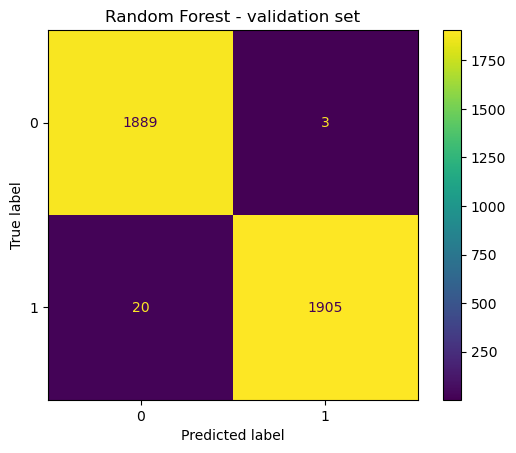

In [59]:
# Create a confusion matrix (random forest model)
log_cm = confusion_matrix(y_val, y_pred_rf)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.title('Random Forest - validation set');
plt.show()

In [60]:
# Classifcation report (random forest model)
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_rf, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



XGBoost

In [61]:
# Use the best estimator from the XGBoost model
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

In [62]:
recall = recall_score(y_val, y_pred_xgb)
print("Recall score (Validation Set XGBoost):", recall)

Recall score (Validation Set XGBoost): 0.9885714285714285


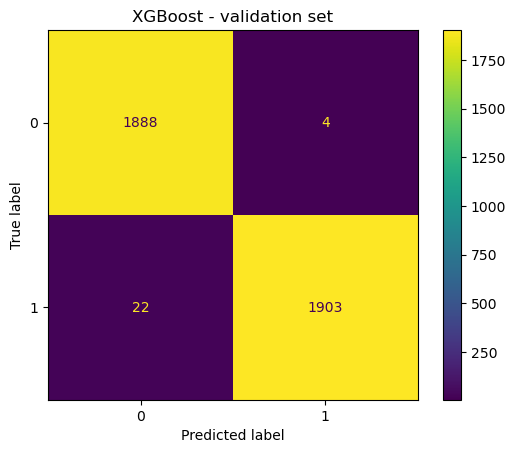

In [63]:
# Create a confusion matrix (XGBoost model)
log_cm = confusion_matrix(y_val, y_pred_xgb)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.title('XGBoost - validation set')
plt.show()

In [64]:
# Classifcation report (XGBoost model)
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



Based on recall scores, the random forest model (Recall: 0.9896) performs slightly better than the XGBoost model(Recall: 0.9886). Therefore, we select the random forest model to make predictions on the test data.

Using random forest model to predict on test data

In [65]:
# Use random forest model to predict on test data
y_pred_rf_test = rf_cv.best_estimator_.predict(X_test)

In [ ]:
recall = recall_score(y_test, y_pred_rf_test)
print("Recall score (Test Set Random Forest):", recall)

accuracy = accuracy_score(y_test, y_pred_rf_test)
print("Accuracy score (Test Set Random Forest):", accuracy)

Recall score (Test Set Random Forest): 0.9920592906299629
Accuracy score (Test Set Random Forest): 0.9960702122085408


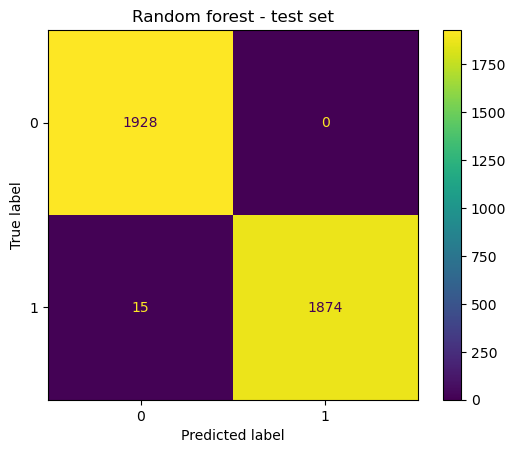

In [67]:
# Confusion matrix
log_cm = confusion_matrix(y_test, y_pred_rf_test)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.title('Random forest - test set');
plt.show()

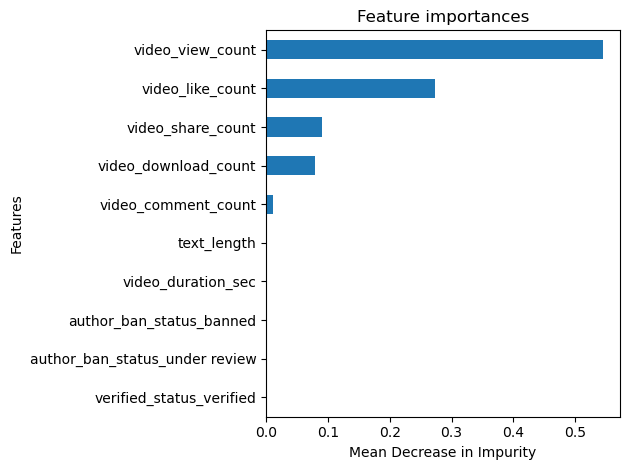

In [68]:
# Create feature importance plot
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=True)

fig, ax = plt.subplots()
rf_importances.plot.barh(ax=ax)
ax.set_title('Feature importances')

ax.set_xlabel('Mean Decrease in Impurity')
ax.set_ylabel('Features')  
plt.tight_layout()
#plt.savefig('Feature importances', dpi=300)
plt.show()

The most predictive features are video view count, video like count, and video share and download count. This suggests that engagement metrics are effective predictors of a video’s claim status.

V. Conclusion

Based on the recall score from the validation set, we selected the random forest model to make predictions on the test set. The results showed that the random forest model performed exceptionally well on test set, achieving a recall score of 99.2% and an accuracy score of 99.6%. The performance indicates that the model will provide accurate predictions for video claim status, significantly improving the workflow efficiency of the content moderation team.